<a href="https://colab.research.google.com/github/IzumiSatoshi/waifu-squarelizer/blob/main/waifu_squarelizer_shared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WAIFU SQUARELIZER 
The image in the input folder is cropped like this using facial recognition, and output to the output folder 
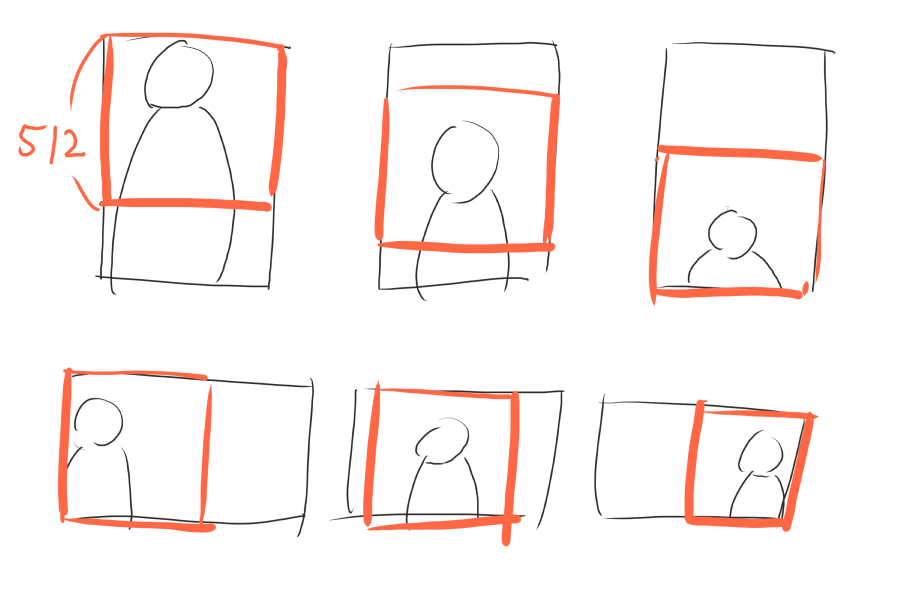

In [ ]:
# mount google drive if you want
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# installation
!pip install openmim
!mim install mmcv-full
!mim install mmdet
!mim install mmpose

!pip install anime-face-detector

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 1.6 MB/s 
     |████████████████████████████████| 235 kB 3.9 MB/s 
     |████████████████████████████████| 51 kB 7.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 40.6 MB 104 kB/s 
     |████████████████████████████████| 190 kB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 1.4 MB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html

In [ ]:
# imports
import cv2
from anime_face_detector import create_detector
from google.colab.patches import cv2_imshow
import glob
import os

In [ ]:
# load model
detector = create_detector('yolov3')

  0%|          | 0.00/235M [00:00<?, ?B/s]

  0%|          | 0.00/37.5M [00:00<?, ?B/s]

load checkpoint from local path: /root/.cache/torch/hub/checkpoints/mmpose_anime-face_hrnetv2.pth
load checkpoint from local path: /root/.cache/torch/hub/checkpoints/mmdet_anime-face_yolov3.pth


/content/drive/MyDrive/dreambooth/chino_screenshot_training/56336ac7.jpg


/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


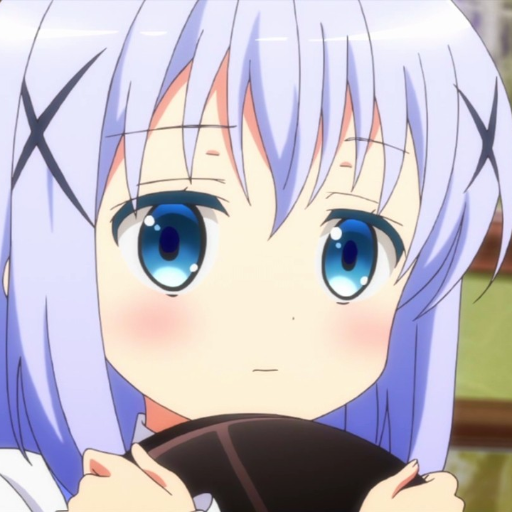

/content/drive/MyDrive/dreambooth/chino_screenshot_training/5ee6445c.jpg


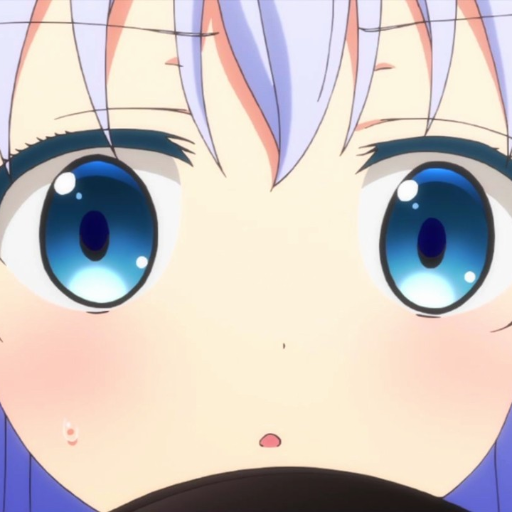

/content/drive/MyDrive/dreambooth/chino_screenshot_training/569a8469.jpg


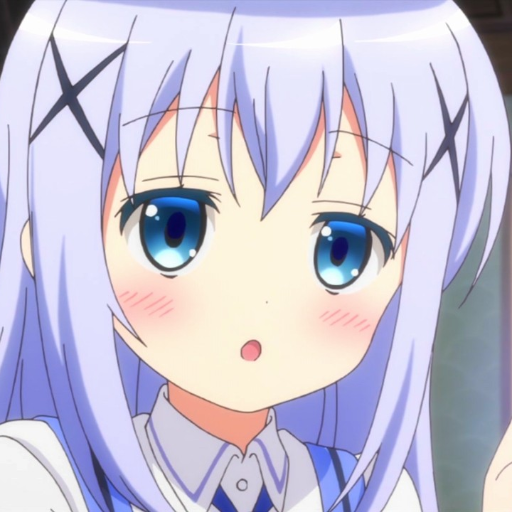

/content/drive/MyDrive/dreambooth/chino_screenshot_training/bf2efba6.jpg


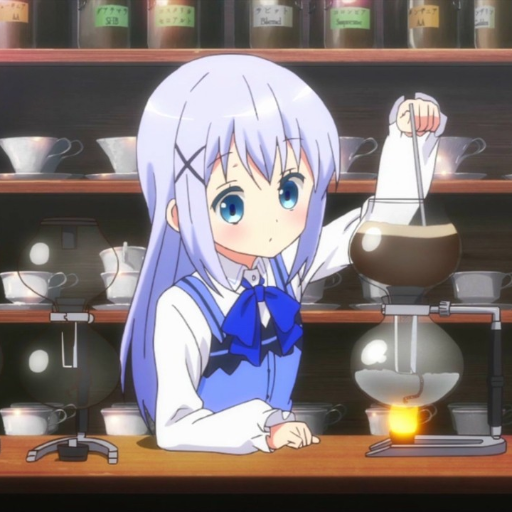

/content/drive/MyDrive/dreambooth/chino_screenshot_training/b70b9941.jpg


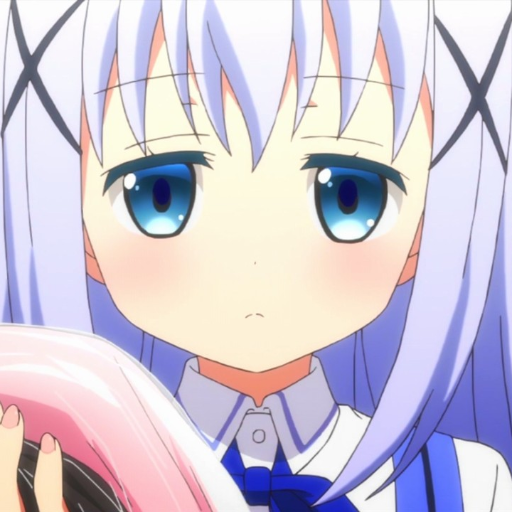

/content/drive/MyDrive/dreambooth/chino_screenshot_training/bdf24c5e.jpg


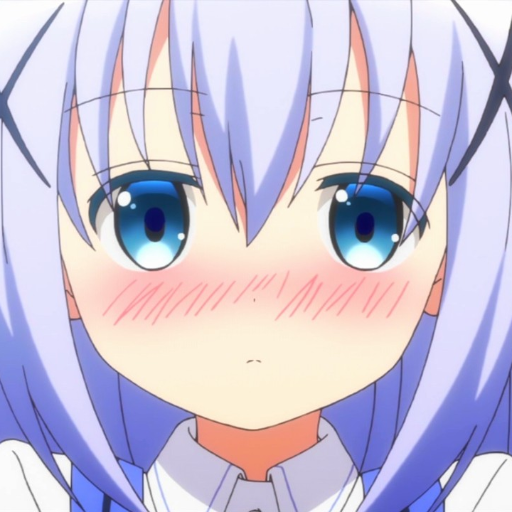

/content/drive/MyDrive/dreambooth/chino_screenshot_training/e06c79fe.jpg


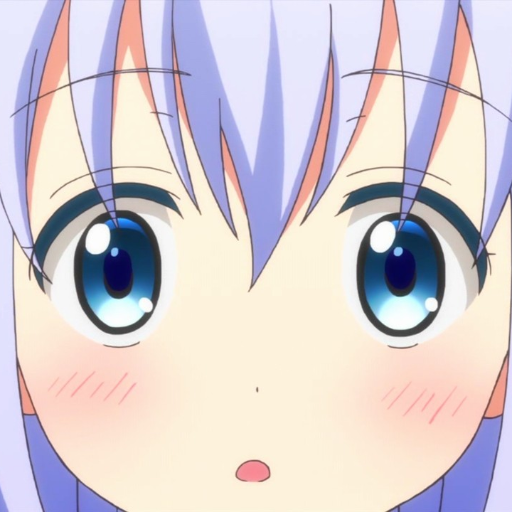

/content/drive/MyDrive/dreambooth/chino_screenshot_training/727f73f7.jpg


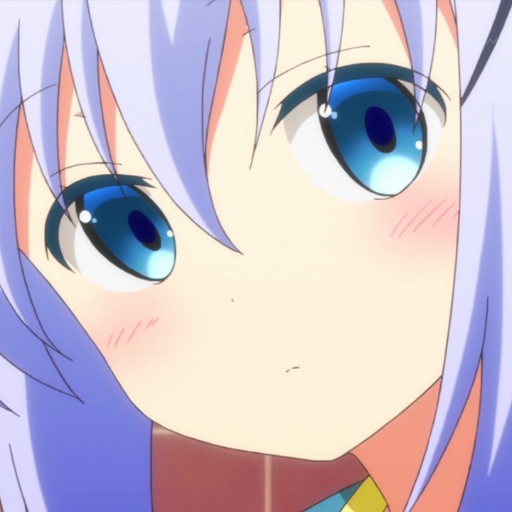

/content/drive/MyDrive/dreambooth/chino_screenshot_training/afa50b4d.jpg


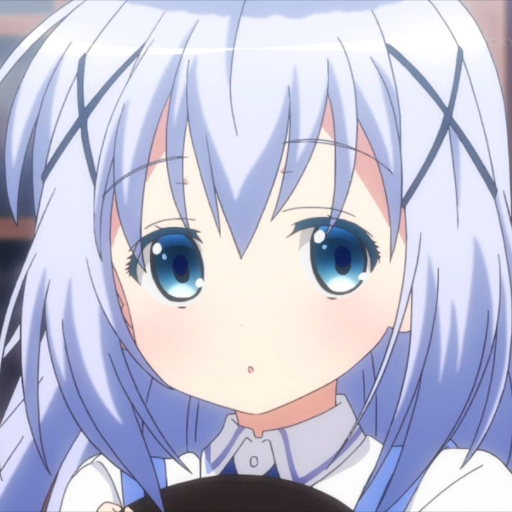

/content/drive/MyDrive/dreambooth/chino_screenshot_training/edc87927.jpg


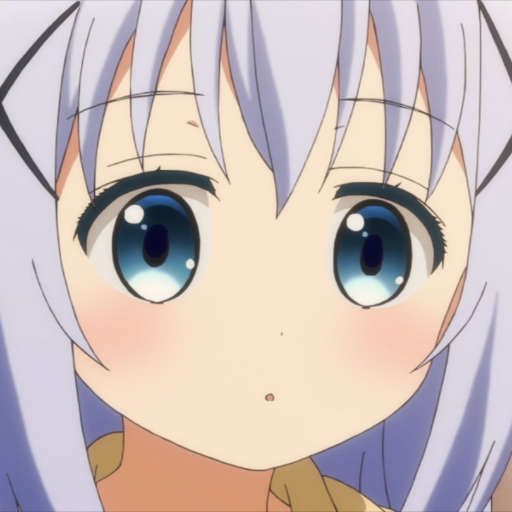

/content/drive/MyDrive/dreambooth/chino_screenshot_training/3be37615.jpg


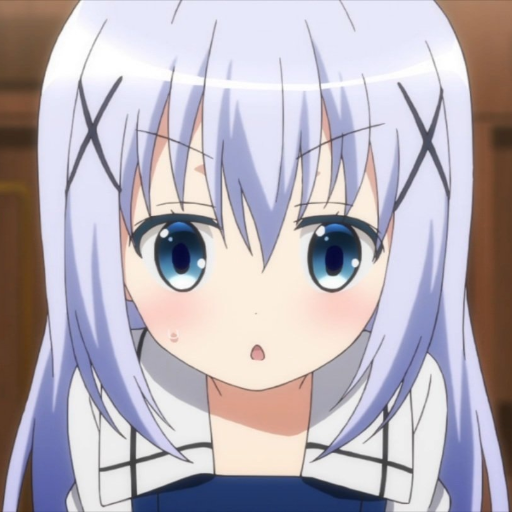

/content/drive/MyDrive/dreambooth/chino_screenshot_training/157e184e.jpg


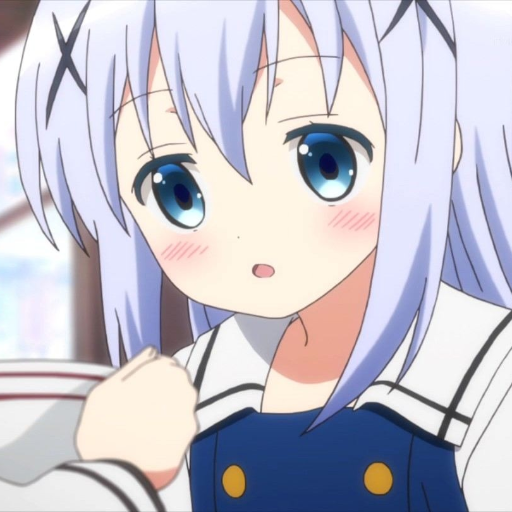

/content/drive/MyDrive/dreambooth/chino_screenshot_training/5c354ab0.jpg


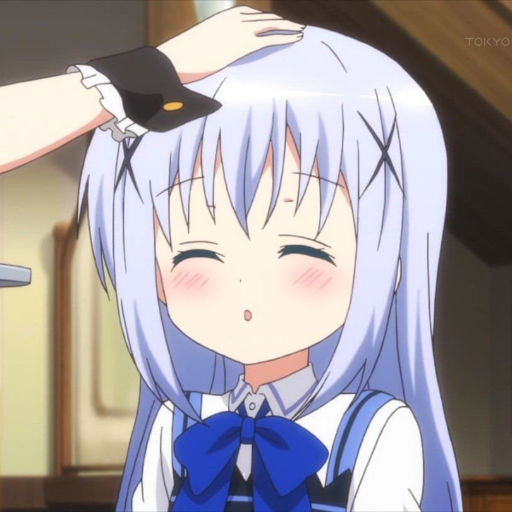

/content/drive/MyDrive/dreambooth/chino_screenshot_training/61c786fe.jpg


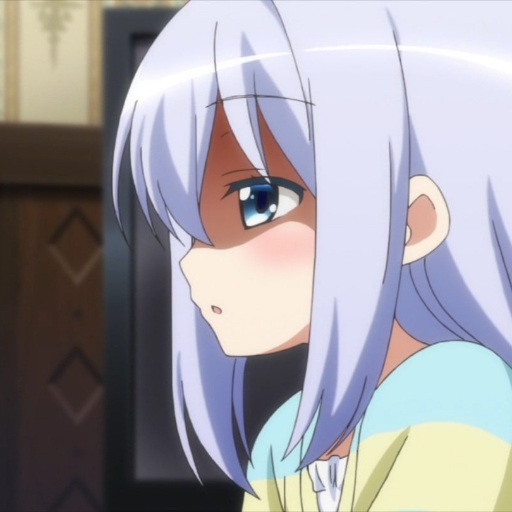

/content/drive/MyDrive/dreambooth/chino_screenshot_training/ElqMzELU4AEhc6_.jpg


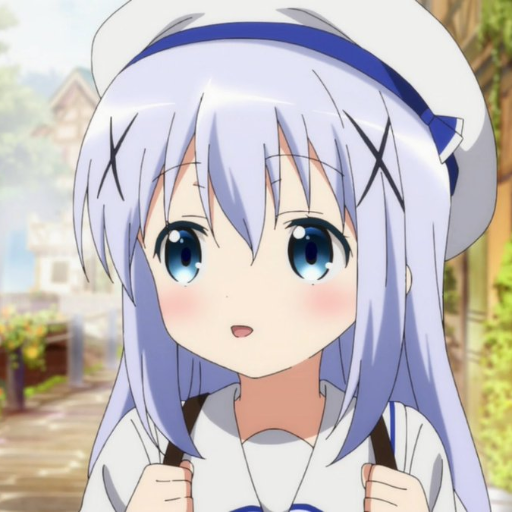

/content/drive/MyDrive/dreambooth/chino_screenshot_training/ElqRAncUYAAMoct.jpg


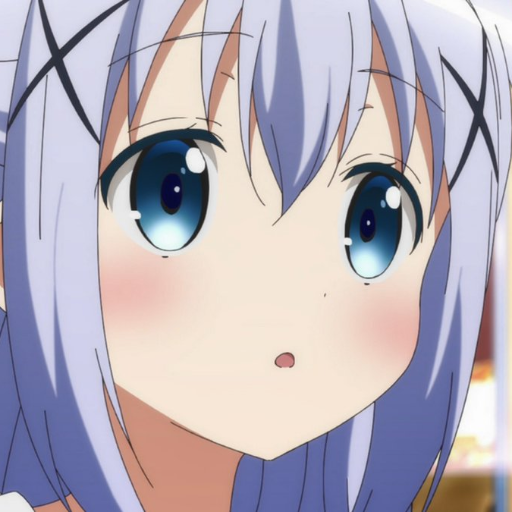

/content/drive/MyDrive/dreambooth/chino_screenshot_training/20210110-gochi-1.jpg


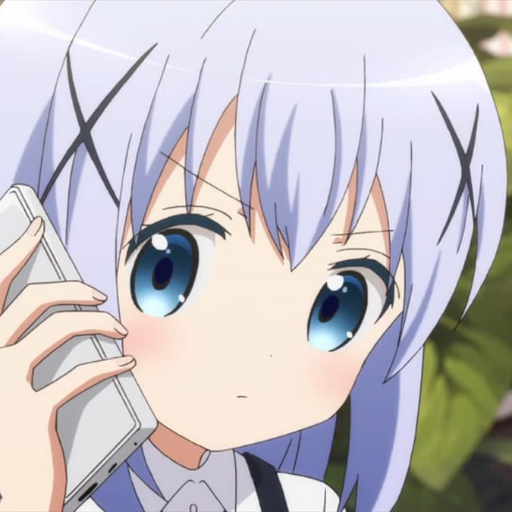

/content/drive/MyDrive/dreambooth/chino_screenshot_training/GU_BLOOM_ep02_1014_still_0032.jpg


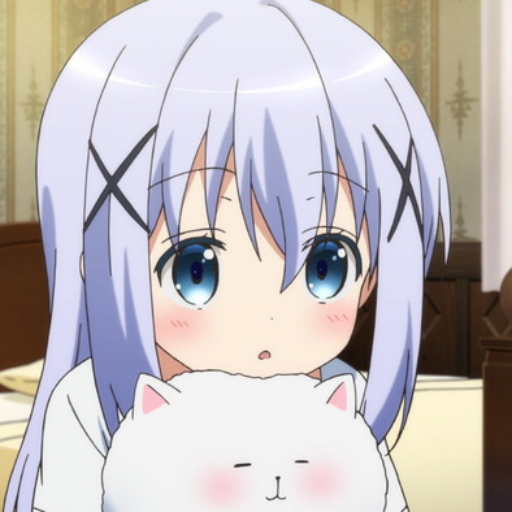

/content/drive/MyDrive/dreambooth/chino_screenshot_training/maxresdefault.jpg


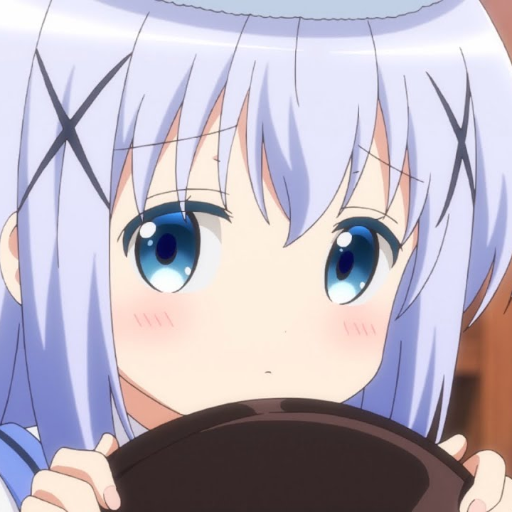

/content/drive/MyDrive/dreambooth/chino_screenshot_training/512x512


ValueError: ignored

In [ ]:
# main
def squarelize(image):
  preds = detector(image)

  if len(preds) == 0:
    return None 

  left = preds[0]['bbox'][0]
  bottom = preds[0]['bbox'][1]
  right = preds[0]['bbox'][2]
  top = preds[0]['bbox'][3]
  x = int((left + right) / 2)
  y = int((top + bottom) / 2)
  height, width = image.shape[:2]
  sq_image = None
  if height > width:
    # portrait
    square_size = width
    if y < square_size / 2:
      sq_image = image[:square_size, :]    
    elif y < height - (square_size / 2):
      sq_image = image[int(y - square_size / 2):int(y + square_size / 2),:]
    else:
      sq_image = image[height - square_size:,:]
  else:
    # landscape
    square_size = height
    if x < square_size / 2:
      sq_image = image[:, :square_size]    
    elif x < width - (square_size / 2):
      sq_image = image[:, int(x - square_size / 2):int(x + square_size / 2)]
    else:
      sq_image = image[:, width - square_size:]
  
  return sq_image


input_dir = "/content/drive/MyDrive/input"#@param{type:"string"}
output_dir = "/content/drive/MyDrive/output"#@param{type:"string"}
output_extension = "jpg"#@param{type:"string"}

if not os.path.exists(output_dir):
  raise ValueError("output_dir is not exist")

paths = glob.glob(input_dir + "/*")
for path in paths:
  basename = os.path.splitext(os.path.basename(path))[0]

  print(path)
  image = cv2.imread(path)
  cv2_imshow(image)
  sq_image = squarelize(image)
  sq_image = cv2.resize(sq_image, dsize=(512, 512))
  if len(sq_image) != 0:
    cv2_imshow(sq_image)
    cv2.imwrite(f"{output_dir}/{basename}.{output_extension}", sq_image)